# Optimized Model with Linear Regression

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle

In [10]:
# flights table
data = pd.read_csv('/Users/Matthew Wong/flights_table_optimized(50,000 points).csv',delimiter=';')
data = data.iloc[: , 1:]

In [11]:
data

,month,day,year,origin_city,origin_city_state,dest_city,dest_city_state,Route,distance,air_time,...,taxi_in_route,dep_delay_city,arr_delay_city,taxi_out_city,taxi_in_city,dep_delay_month,arr_delay_month,taxi_out_month,taxi_in_month,arr_delay
0,12,30,2019,New Orleans,LA,Fort Lauderdale,FL,New Orleans to Fort Lauderdale,674.0,84.0,...,8.444444,1.710611,-4.176849,11.800643,8.057878,0.892546,-5.488575,17.429543,7.718988,-3.0
1,4,8,2018,Seattle,WA,Oakland,CA,Seattle to Oakland,672.0,98.0,...,6.208333,1.014692,-4.634527,19.509642,6.965106,-0.045202,-5.727201,16.802538,7.431139,25.0
2,11,21,2018,Charleston,SC,Atlanta,GA,Charleston to Atlanta,259.0,46.0,...,10.238095,-1.163522,-7.421384,14.861635,8.779874,0.093850,-5.732620,16.940107,7.404545,-13.0
3,12,19,2019,Fort Lauderdale,FL,Pittsburgh,PA,Fort Lauderdale to Pittsburgh,994.0,128.0,...,5.333333,1.163701,-4.740214,17.135231,7.814947,0.892546,-5.488575,17.429543,7.718988,-16.0
4,9,21,2019,Roanoke,VA,Chicago,IL,Roanoke to Chicago,530.0,82.0,...,10.666667,1.934783,-4.913043,18.152174,8.673913,-0.826970,-6.525318,16.681560,7.540753,-36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44546,2,3,2018,San Diego,CA,Oakland,CA,San Diego to Oakland,446.0,65.0,...,5.633333,0.372477,-5.754128,16.660550,7.174312,0.883360,-5.081141,17.334707,7.443106,-15.0
44547,6,28,2019,Rochester,NY,Philadelphia,PA,Rochester to Philadelphia,257.0,52.0,...,8.625000,-3.457364,-8.736434,16.627907,9.007752,1.205238,-3.986905,16.817477,7.748797,-18.0
44548,3,3,2018,Chicago,IL,St. Louis,MO,Chicago to St. Louis,258.0,45.0,...,5.307692,1.995374,-3.535852,19.684271,6.208173,0.385367,-5.524430,16.681283,7.369582,-24.0
44549,9,5,2018,Atlanta,GA,Bloomington/Normal,IL,Atlanta to Bloomington/Normal,533.0,74.0,...,3.500000,2.164212,-4.487729,16.423918,6.187416,-0.826970,-6.525318,16.681560,7.540753,-12.0


In [12]:
# Encode Cateogircal Values 
# Change dtype of variable to category then encode using cat.codes
data['origin_city_state'] = data['origin_city_state'].astype('category')
data['origin_city'] = data['origin_city'].astype('category')
data['dest_city_state'] = data['dest_city_state'].astype('category')
data['dest_city'] = data['dest_city'].astype('category')
data['Route'] = data['Route'].astype('category')

data['origin_city_state'] = data['origin_city_state'].cat.codes
data['origin_city'] = data['origin_city'].cat.codes
data['dest_city_state'] = data['dest_city_state'].cat.codes
data['dest_city'] = data['dest_city'].cat.codes
data['Route'] = data['Route'].cat.codes

In [13]:
display(data.head())
display(data.shape)

,month,day,year,origin_city,origin_city_state,dest_city,dest_city_state,Route,distance,air_time,...,taxi_in_route,dep_delay_city,arr_delay_city,taxi_out_city,taxi_in_city,dep_delay_month,arr_delay_month,taxi_out_month,taxi_in_month,arr_delay
0,12,30,2019,220,17,105,8,2987,674.0,84.0,...,8.444444,1.710611,-4.176849,11.800643,8.057878,0.892546,-5.488575,17.429543,7.718988,-3.0
1,4,8,2018,296,49,233,4,4370,672.0,98.0,...,6.208333,1.014692,-4.634527,19.509642,6.965106,-0.045202,-5.727201,16.802538,7.431139,25.0
2,11,21,2018,52,40,17,9,604,259.0,46.0,...,10.238095,-1.163522,-7.421384,14.861635,8.779874,0.093850,-5.732620,16.940107,7.404545,-13.0
3,12,19,2019,103,8,249,37,1730,994.0,128.0,...,5.333333,1.163701,-4.740214,17.135231,7.814947,0.892546,-5.488575,17.429543,7.718988,-16.0
4,9,21,2019,267,46,61,13,3848,530.0,82.0,...,10.666667,1.934783,-4.913043,18.152174,8.673913,-0.826970,-6.525318,16.681560,7.540753,-36.0


(44551, 24)

variables ['month', 'day', 'year', 'origin_city', 'origin_city_state', 'dest_city', 'dest_city_state', 'Route', 'distance', 'air_time', 'depart_hour', 'dep_delay_route', 'arr_delay_route', 'taxi_out_route', 'taxi_in_route', 'dep_delay_city', 'arr_delay_city', 'taxi_out_city', 'taxi_in_city', 'dep_delay_month', 'arr_delay_month', 'taxi_out_month', 'taxi_in_month']
coefficients: [-3.27689361e-02  2.97188264e-04 -3.33157082e-01 -9.68812065e-03
 -1.31339405e-02 -4.34618146e-03  4.45835545e-03  8.90384152e-04
 -3.51531629e-02  2.99773401e-01  3.30417684e-03  1.12626219e-01
  8.53485799e-01  1.08375031e-01 -6.25469603e-02 -3.24576304e-01
  3.35453232e-01 -2.93750579e-01 -3.10809736e-01 -6.33402804e-01
  1.17301856e+00 -2.48956348e-01  2.01724075e+00]

R2 Score for train data: 0.195
R2 Score2 for test data: 0.196
MAE Score for test data:  10.66


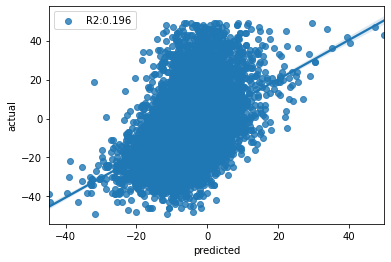

In [14]:
#Assign train and target variables
X = data[['month','day','year','origin_city','origin_city_state','dest_city','dest_city_state','Route','distance','air_time','depart_hour','dep_delay_route','arr_delay_route','taxi_out_route','taxi_in_route','dep_delay_city','arr_delay_city','taxi_out_city','taxi_in_city','dep_delay_month','arr_delay_month','taxi_out_month','taxi_in_month']]
y = data['arr_delay']

# split X and y into training and testing sets 
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=123)

# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#initialize and fit training dataset
model = LinearRegression()
model.fit(X_train, y_train)

#save the model
#filename = 'Linear_Regression_Model.sav'
#pickle.dump(model,open(filename, 'wb'))

#make prediction 
y_pred = model.predict(X_test)

#prints the coefficients used for each attribute
print('variables', list(X.columns))
print('coefficients:', model.coef_)
print()

#prints the R2 score for your test dataset
print('R2 Score for train data:', round(model.score(X_train,y_train),3))
print('R2 Score2 for test data:', round(r2_score(y_test,y_pred),3))
print('MAE Score for test data: ', round(mean_absolute_error(y_test,y_pred),2))

df = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
df

sns.regplot(x='predicted',y='actual',data=df,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()